# r/WallStreetBets and its influence on the stock market

Team Name: __The Diamond Hands 💎🤲__

Team Members: 

* Kendal Collins (kendalcollins23@vt.edu)
* Anthony Nguyen (anthonyqn@vt.edu)
* Nathan Hufano (nhufano265@vt.edu)
* Camden Landis (craine@vt.edu)

# A Brief History
### GME and Toxic Markets
No one could have anticipated that a struggling video game retailer would be at the center of a next-level frenzy in the stock market that captivated the world, bankrupted multiple hedge funds, and upended the conventions about small, internet-toxic investors. Users from the Reddit page r/wallstreetbets earlier this month bought up masses of stock from GameStop (stock ticker: GME), sending the price soaring and forcing institutional investors who bet against the company to back out--performing what's known as a "short squeeze."

When a hedge fund or investor __shorts a stock__, they basically speculate that its price will go down. They do that by borrowing, usually from a broker-dealer, shares of a stock that they think will lose value by a set date and then selling them at the market price.

What happens with a short squeeze is that when the price of the stock being shorted starts to climb, it forces traders betting it will fall to buy it, to try to stem their losses. That drives up the price of the stock even higher.

The phenomenon--where short sellers are forced to repurchase stock as prices rise, thereby pushing the price higher--isn't new, but the combination of characters and technology and novel trading platforms forced Wall Street and regulators to pay attention to retail investors as never before. Most of the success of these retail investors can be contibuted to mass level of communication among these internet peers.

### The Risk (?)
The question is, do these retail investors understand what they're doing? And does their outsized influence represent risk to the markets? Do we have a new level of systemic risk injected into the market by individuals that appear to be more gambling than actually investing?

### The Timeline
* Dec. 8, 2020: GameStop reports dismal earnings, stock takes a tumble

<img src="https://s.abcnews.com/images/Business/game-stop1-file-ap-ml-210127_1611758763141_hpMain_16x9_992.jpg" width=500 height=300 />

* Jan. 11, 2021: GameStop appoints 3 new directors to its board, including co-founder of e-commerce giant Chewy
* Jan 13, 2021: Stock surges more than 50%
* Jan. 19, 2021: Citron Research calls GameStop buyers 'suckers'

<img src="https://deepnote.com/collab/8/project/169bfa36-708d-426e-97fc-f7ee00b8d5b5/download-file?path=%2FImages%2Fsuckers.JPG&mtime=2021-05-04T16%3A42%3A48.000Z" width=500 height=300 />

* Jan. 21, 2021: GME closes at $43.03
* Jan. 22, 2021: GME surges 50%
* Jan. 25, 2021: GME reaches all-time high at $325.00
* Jan. 26, 2021: "GameStonk" gets celeb backing from Elon Musk

<img src="https://s.abcnews.com/images/Business/musk-rt-rc-210203_1612370969642_hpEmbed_3x2_992.jpg" width=500 height=300 />

* Jan. 27, 2021: Major short sellers close -- at a significant loss
* Jan. 28, 2021: Robinhood and other platforms restrict transactions for GME, lawmakers react
* Jan. 29, 2021: SEC weighs in, trading platforms re-allow most GME transactions
* Feb. 2, 2021: GME falls, all eyes on what comes next
* Feb. 4, 2021: Treasury Secretary Janet Yellen meets with regulators, GME opens at $91.19 a share.
* Feb. 6, 2021: GME closes at $53.33 a share.


Sources:
* https://abcnews.go.com/Business/gamestop-timeline-closer-saga-upended-wall-street/story?id=75617315
* https://abcnews.go.com/Business/reddit-users-gamestop-stock-soaring-upending-market/story?id=75513249

# 1) Research Problem
### Question & Motivation
The rise in popularity of GameStop's stock, GME, due to the popular internet forum Reddit gave us questions as to just how much the website can affect the stock market. Do people posting about a particular stock actually cause people to buy said stock? If someone is talking badly about a particular stock, then will there be a drop in price of the stock?

### Methods
To determine whether or not someone is talking highly or poorly about a particular stock, we can perform sentiment analysis on a particular post and attempt to correlate it to the stock under discussion on the day the post was made with the use of different plotting tools.

# 2) Data Collection
Though we could manually web scrape Reddit and stock market analysis sites for obtaining data, we plan on utilizing multiple sufficiently large datasets from Kaggle. These datasets include r/WallStreetBets text posts, historical GameStop (GME) stock prices, and historical daily prices of all United States stocks and ETFs. Our Reddit dataset will contain data about a post's text, title, and comments for sentimental analysis.


In [ ]:
# Imports used throughout the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
import random
import seaborn as sns
import string

In [ ]:
# preview of stock market dataset
gmeDF = pd.read_csv('/work/Stocks/GME.csv')
gmeDF.head(5)

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,13-02-2002,9.525,9.625,19054000,10.060,10.050,6.766666
1,14-02-2002,9.925,10.175,2755400,10.195,10.000,6.733003
2,15-02-2002,9.850,10.000,2097400,10.025,9.950,6.699336
3,19-02-2002,9.375,9.900,1852600,9.900,9.550,6.430017
4,20-02-2002,9.525,9.600,1723200,9.875,9.875,6.648838


Initially the Reddit dataset that was downloaded from Kaggle has numerous NaN in its body data and was missing comments from a post. This would limit our sentimental analysis on titles only.  We decided to extract said comments ourselves with the use of Reddit's API which has its own web scraping functions alongside the dataset we obtained from Kaggle.

In [ ]:
# preview of Reddit dataset with no comments
wsbDF = pd.read_csv("/work/Reddit/reddit_wsb.csv")
wsbDF.head(5)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


### The following code is written in markdown as it takes ages to run

Reddit has its own API and documentation where it makes it easier to web scrape specific data of said site. Based on our understanding and usage, one must have an Reddit account to access the API and the time it takes to collect comment data from Reddit is extensive.  We have written it in markdown so that the notebook does not run for hours on end.

The following code is the initial setup in using Reddit's API.

```python
import praw #stands for "Python Reddit Api Wrapper"
import json

credentials = 'reddit_login_cred.json'
 
with open(credentials) as f:
    creds = json.load(f)
    
reddit = praw.Reddit(client_id=creds['client_id'],
                     client_secret=creds['client_secret'],
                     user_agent=creds['user_agent'],
                     redirect_uri=creds['redirect_uri'],
                     refresh_token=creds['refresh_token'])

```

We encountered an error when extracting comments from a post that contained +50,000 comments and would result in a HTTP 413 error response. We have decided to extract only parent comments (aka main comment) and no child comments (aka responses to main) from a post for our data collection to work successfully.  

The following python function was used to scrape the parent comments of a post.

```python
from praw.models import MoreComments
import prawcore # helps dealing with Reddit's HTTP response codes

# Returns all parent comments from a post in a form of a list
# csvID = ID from CSV file 
def get_parent_comments(csvID):
    text = []
    post = reddit.submission(id=csvID)
    
    try:
        for comment in post.comments: #fetches only the PARENT comments
            if isinstance(comment, MoreComments):
                continue
            text.append(comment.body)
    except (prawcore.exceptions.Redirect, prawcore.exceptions.NotFound):
        text.append(['POST_DNE'])
    
    return text
```

Using the helper function from above, we extracted the comments, added them into a list and append said list as a new column to our existing Reddit dataframe. As a result, this gets rid of the error response and we can resume updating our dataset.

```python
post_comments = [] 

for id in wsbDF.id:
    extractedComms = get_parent_comments(id)
    post_comments.append(extractedComms)

wsbDF['post_comments'] = post_comments

```

From here, our dataset is updated with the necessary information to perform sentimental analysis. We initialize the reddit posts with comments dataframe in the code cell below.

In [ ]:
wsbDF = pd.read_csv("/work/Reddit/reddit_wsb_with_comments.csv")
wsbDF.head(5)

,title,score,id,url,comms_num,created,body,timestamp,post_comments
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,['yeah just hope everyone deletes their 420 li...
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,['Had to edit the video to fit under 1 minute....
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,"['Fake news', ""I'll exit your mother when I'm ..."
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,"['It means buy buy buy.', 'Some random company..."
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,"['what does this mean:/', 'GME ALL THE WAY', '..."


Arguably, we addressed all three of the data requirements. The datasets we are utilizing for this project are sufficiently large for finding some time-expansive correlations between particular sentiments on the r/WallStreetBets subreddit and specific stock value fluctuations. For this project we are also comparing stock market data to r/WallStreetBets sentiments, so we can attempt to find interesting connections between the two. Finally, given that we had to web-scrape the subreddit for finding each post's comments, we also successfully derived data from our original source to analyze later.




# 3) Processing the Data

### Cleaning stock market data:
The date format for stock market data is in DD-MM-YYYY which is not well known (our opinion: in the United States) and can cause confusion and reading said dates. In the code below, we change the given date to be in American format as part of the cleaning process. We also trimmed the date range to be from Jan 28,2021 to the end of date of the given dataset to align with the Reddit dataset.

In [ ]:
# format date to be in American notation
gmeDF['Date'] = pd.to_datetime(gmeDF['Date'], dayfirst=True)
gmeDF['Date'] = gmeDF['Date'].dt.strftime('%b %d,%Y')

# trim dataset by time range
gmeDF = gmeDF.set_index('Date')
gmeDF = gmeDF['Jan 28,2021':]
gmeDF.head(5)

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
"Jan 28,2021",112.250000,265.000000,58815800,483.000000,193.600006,193.600006
"Jan 29,2021",250.000000,379.709991,50566100,413.980011,325.000000,325.000000
"Feb 01,2021",212.000000,316.559998,37382200,322.000000,225.000000,225.000000
"Feb 02,2021",74.220001,140.759995,78183100,158.000000,90.000000,90.000000
"Feb 03,2021",85.250000,112.010002,42698500,113.400002,92.410004,92.410004


### Cleaning Reddit data:
We also begin cleaning and extracting the words for both post titles and its comments to perform sentiment analysis in later processes. We start with changing the given dates to be in American format.

In [ ]:
# removes posts that don't exist and 0 comments scraped
wsbDF = wsbDF[wsbDF['post_comments']!=('[]')] 
wsbDF = wsbDF[wsbDF['post_comments']!=(str([['POST_DNE']]))]

# format time data to be in American notation
wsbDF['timestamp'] = wsbDF.timestamp.map(lambda date: date[:10])
wsbDF['timestamp'] = pd.to_datetime(wsbDF['timestamp'])
wsbDF['timestamp'] = wsbDF['timestamp'].dt.strftime('%b %d,%Y')

# used in stripping away punctuation and numbers 
exclude = string.punctuation + string.digits

The updated Reddit dataset contained many columns that we deemed unnecessary for our analysis. We made two separate dataframes; one for titles and one for comments as it makes it easier to distinguish the data we will work on for future analysis.

In [ ]:
# start of cleaning title data

# creates a titles only dataframe
titles = wsbDF[['title','timestamp']].copy()

# cleans the title data by turning it into a bag-of-words model
titles['clean_text'] = titles.title.map(lambda t: t.translate(str.maketrans(exclude,' '*len(exclude))).lower().split())

# removes single letters and anything that is not a word (ex: emojis)
titles['clean_text'] = [[w for w in bag if (len(w)>1 and w.isalpha())] for bag in titles['clean_text']] 

# creates a wall of text for wordcloud usage
titles['clean_text'] = [' '.join(w for w in bag if w.isalpha()) for bag in titles['clean_text']]

titles.head(3)

,title,timestamp,clean_text
0,"It's not about the money, it's about sending a...","Jan 28,2021",it not about the money it about sending message
1,Math Professor Scott Steiner says the numbers ...,"Jan 28,2021",math professor scott steiner says the numbers ...
2,Exit the system,"Jan 28,2021",exit the system


In [ ]:
# start of cleaning comment data

# creates a comment only dataframe
comments = wsbDF[['post_comments','timestamp']].copy()

# cleans the title data by turning it into a bag-of-words model
comments['clean_text'] = comments.post_comments.map(lambda t: t.translate(str.maketrans(exclude,' '*len(exclude))).lower().split())

# removes single letters and anything that is not a word
comments['clean_text'] = [[w for w in bag if (len(w)>1 and w.isalpha())] for bag in comments['clean_text']]

# creates a wall of text for wordcloud usage
comments['clean_text'] = [' '.join(w for w in bag if w.isalpha()) for bag in comments['clean_text']]

comments.head(3)

,post_comments,timestamp,clean_text
0,['yeah just hope everyone deletes their 420 li...,"Jan 28,2021",yeah just hope everyone deletes their limits i...
1,['Had to edit the video to fit under 1 minute....,"Jan 28,2021",had to edit the video to fit under minute here...
2,"['Fake news', ""I'll exit your mother when I'm ...","Jan 28,2021",fake news ll exit your mother when done with h...


### Sentiment Analysis

Here we utilize the natural language toolkit module to obtain sentimental scores on both title and comment data. Not only do we get the scores for positve and negative sentiment, we also get scores for neutral sentiment.

In [ ]:
nltk.downloader.download('vader_lexicon')
sia = SIA()

# creates the sentiment values for post titles (wot = wall of text)
titles['sentiments'] = titles['clean_text'].apply(lambda wot: sia.polarity_scores(wot))

# creates columns for each type of sentiment score and rounding the scores to the lowest decimal possible
titles['positive_sentiment'] = titles['sentiments'].apply(lambda x: x['pos']+1*(1e-6)) 
titles['neutral_sentiment'] = titles['sentiments'].apply(lambda x: x['neu']+1*(1e-6))
titles['negative_sentiment'] = titles['sentiments'].apply(lambda x: x['neg']+1*(1e-6))

titles.drop(columns=['sentiments'], inplace=True)

titles.head(3)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,title,timestamp,clean_text,positive_sentiment,neutral_sentiment,negative_sentiment
0,"It's not about the money, it's about sending a...","Jan 28,2021",it not about the money it about sending message,0.000001,1.000001,0.000001
1,Math Professor Scott Steiner says the numbers ...,"Jan 28,2021",math professor scott steiner says the numbers ...,0.000001,0.728001,0.272001
2,Exit the system,"Jan 28,2021",exit the system,0.000001,1.000001,0.000001


In [ ]:
# creates sentiment values for post comments (wot = wall of text)
comments['sentiments'] = comments['clean_text'].apply(lambda wot: sia.polarity_scores(wot))

# creates columns for each type of sentiment score and rounding the scores to the 10^-6 power
comments['positive_sentiment'] = comments['sentiments'].apply(lambda x: x['pos']+1*(1e-6)) 
comments['neutral_sentiment'] = comments['sentiments'].apply(lambda x: x['neu']+1*(1e-6))
comments['negative_sentiment'] = comments['sentiments'].apply(lambda x: x['neg']+1*(1e-6))

comments.drop(columns=['sentiments'], inplace=True)

comments.head(3)

,post_comments,timestamp,clean_text,positive_sentiment,neutral_sentiment,negative_sentiment
0,['yeah just hope everyone deletes their 420 li...,"Jan 28,2021",yeah just hope everyone deletes their limits i...,0.146001,0.740001,0.114001
1,['Had to edit the video to fit under 1 minute....,"Jan 28,2021",had to edit the video to fit under minute here...,0.145001,0.703001,0.153001
2,"['Fake news', ""I'll exit your mother when I'm ...","Jan 28,2021",fake news ll exit your mother when done with h...,0.131001,0.705001,0.164001


# 4) Visualizing the Data

According to our plotted sentiment graphs, the dominant sentiment across the Reddit post titles is a neutral one. Though there are thousands of posts with positive and/or negative sentiment values, clearly, neutral sentiment encompassed a majority of the posts.

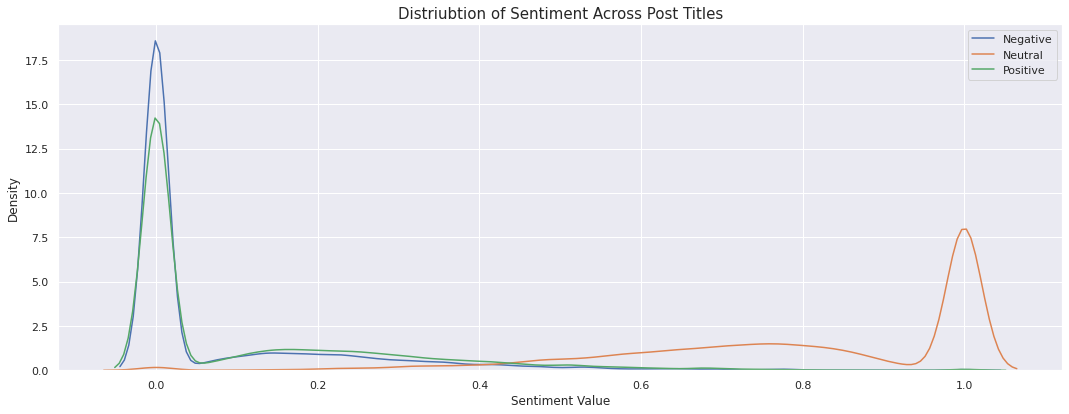

In [ ]:
sns.set(rc={'figure.figsize':(18,14)})

ax = plt.subplot(2,1,1)
plt.title('Distriubtion of Sentiment Across Post Titles',fontsize=15)
sns.kdeplot(titles['negative_sentiment'], bw_method=0.1)
sns.kdeplot(titles['neutral_sentiment'], bw_method=0.1)
sns.kdeplot(titles['positive_sentiment'], bw_method=0.1)
ax.legend(['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment Value', fontsize=12)

plt.show()

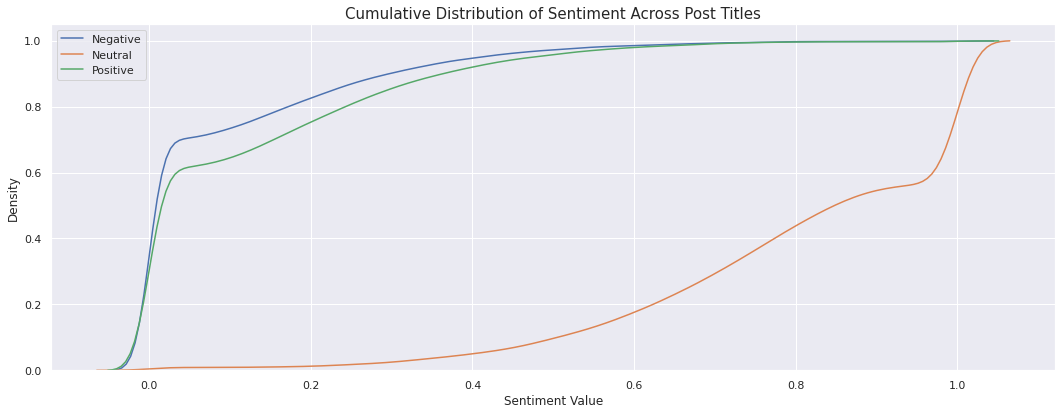

In [ ]:
ax = plt.subplot(2,1,2)
plt.title('Cumulative Distribution of Sentiment Across Post Titles',fontsize=15)
sns.kdeplot(titles['negative_sentiment'], bw_method=0.1, cumulative=True)
sns.kdeplot(titles['neutral_sentiment'], bw_method=0.1, cumulative=True)
sns.kdeplot(titles['positive_sentiment'], bw_method=0.1, cumulative=True)

ax.legend(['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment Value', fontsize=12)

plt.show()

The comment data almost tells a similar story, the dominant sentiment across the Reddit post comments is neutral but has a lower density than the neutral sentiment of post titles. The density is also lower for both positive and negative sentiment in relation to post titles.

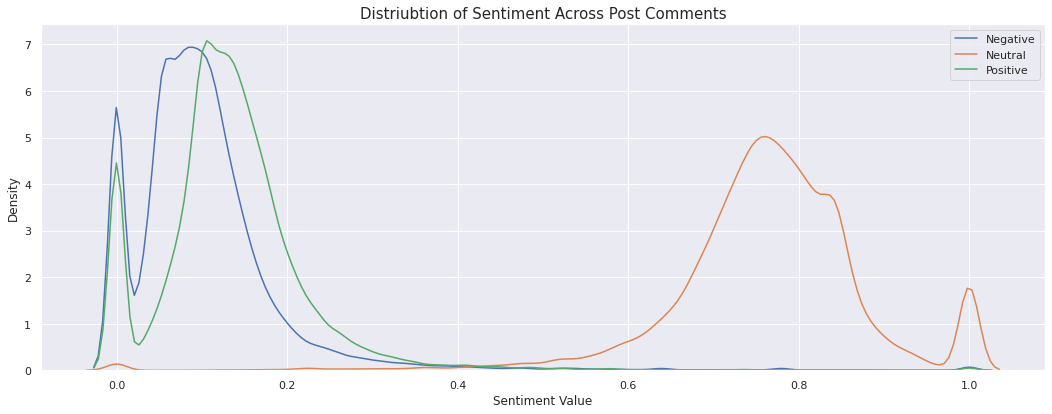

In [ ]:
sns.set(rc={'figure.figsize':(18,14)})

ax = plt.subplot(2,1,1)
plt.title('Distriubtion of Sentiment Across Post Comments',fontsize=15)
sns.kdeplot(comments['negative_sentiment'], bw_method=0.1)
sns.kdeplot(comments['neutral_sentiment'], bw_method=0.1)
sns.kdeplot(comments['positive_sentiment'], bw_method=0.1)
ax.legend(['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment Value', fontsize=12)

plt.show()

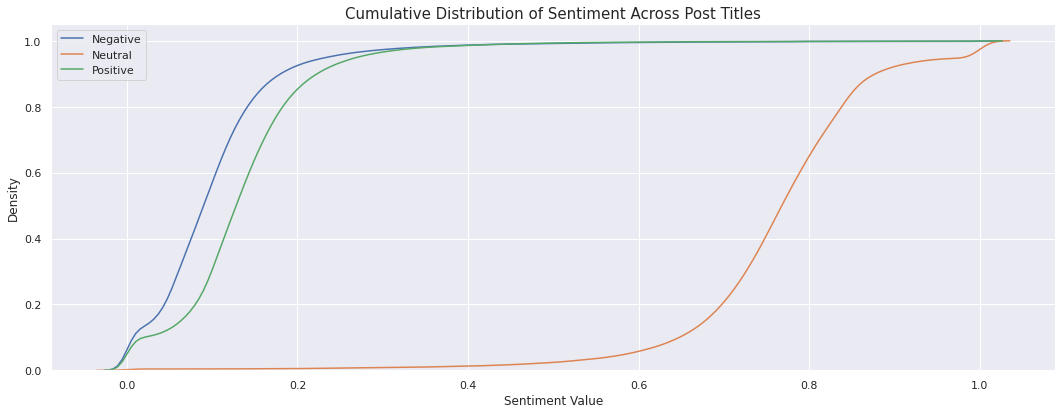

In [ ]:
ax = plt.subplot(2,1,2)
plt.title('Cumulative Distribution of Sentiment Across Post Titles',fontsize=15)
sns.kdeplot(comments['negative_sentiment'], bw_method=0.1, cumulative=True)
sns.kdeplot(comments['neutral_sentiment'], bw_method=0.1, cumulative=True)
sns.kdeplot(comments['positive_sentiment'], bw_method=0.1, cumulative=True)

ax.legend(['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment Value', fontsize=12)

plt.show()

Here, we utilize the `wordcloud` module to visualize the most commonly used positive and negative sentiment words, starting with title data.

In [ ]:
# wordcloud plot for title data

freq_positive = titles[titles["positive_sentiment"].between(0.5,1)]['clean_text']
freq_negative = titles[titles["negative_sentiment"].between(0.5,1)]['clean_text']

freq_positive_text = ' '.join(freq_positive)
freq_negative_text = ' '.join(freq_negative)

pos_wordcloud = WordCloud(width=1000,height=750, collocations=False, background_color='white').generate(freq_positive_text)
neg_wordcloud = WordCloud(width=1000,height=750, collocations=False, background_color='white').generate(freq_negative_text)

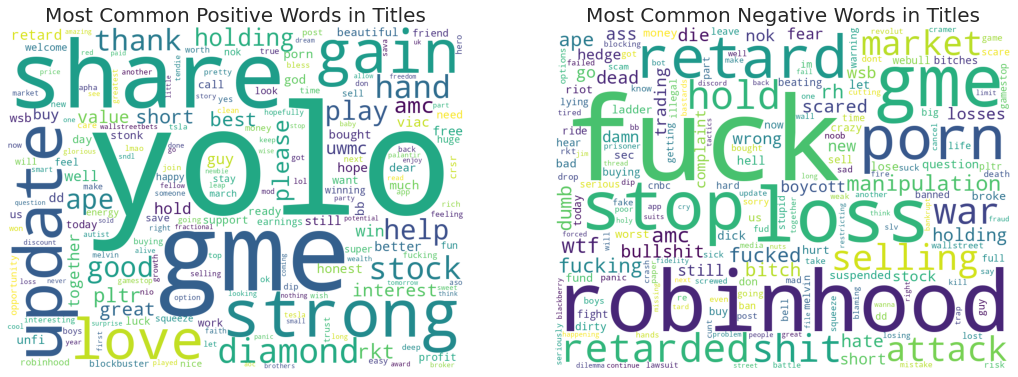

<Figure size 576x432 with 0 Axes>

In [ ]:
plt.subplot(1,2,1)
plt.title('Most Common Positive Words in Titles', fontsize=20)
plt.imshow(pos_wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Most Common Negative Words in Titles', fontsize=20)
plt.imshow(neg_wordcloud)
plt.axis('off')

plt.figure(figsize=(8, 6))
plt.show()

"yolo" (or "YOLO") was the most commonly used word/phrase that had a positive sentiment association. For those unaware, YOLO stands for "you only live once" which indicates that taking a risk, such as investing all of one's savings into a dying video game sales corporation, is totally worth it relative to one's mortality. "gme" was a close second which is understandable given the popularity of the GameStop stock ticker on the subreddit. Many positive words like 'strong','thank', and 'love were used to glorify the value of GME stocks.

"gme" along with some profanity were the most commonly used words/phrases that had a negative sentiment association. Clearly, loss of stock value must have some correlation to the negative sentiment. Given the debacle with Robinhood during the GameStop short-selling week, Robinhood also has tremendous negative sentiment associated with it.

In [ ]:
# wordcloud plot for comment data

freq_positive = comments[comments["positive_sentiment"].between(0.3,1)]['clean_text']
freq_negative = comments[comments["negative_sentiment"].between(0.5,1)]['clean_text']

freq_positive_text_comments = ' '.join(freq_positive)
freq_negative_text_comments = ' '.join(freq_negative)

pos_wordcloud_comments = WordCloud(width=1000,height=750, collocations=False, background_color='white').generate(freq_positive_text_comments)
neg_wordcloud_comments = WordCloud(width=1000,height=750, collocations=False, background_color='white').generate(freq_negative_text_comments)

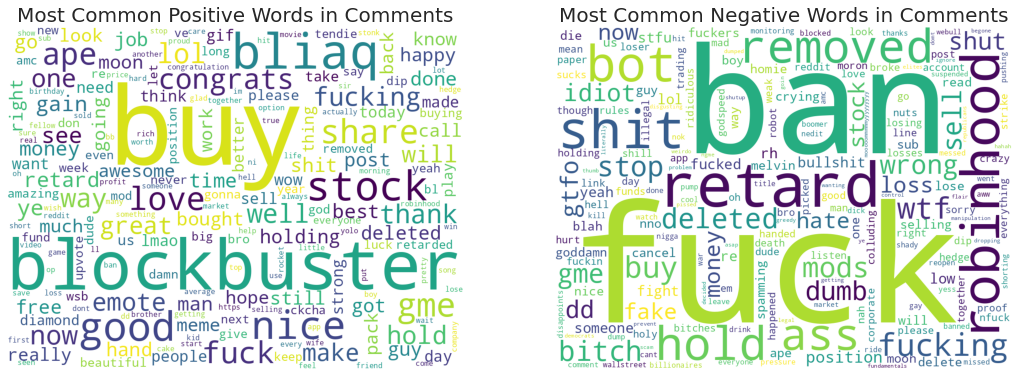

In [ ]:
plt.subplot(1,2,1)
plt.title('Most Common Positive Words in Comments', fontsize=20)
plt.imshow(pos_wordcloud_comments)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Most Common Negative Words in Comments', fontsize=20)
plt.imshow(neg_wordcloud_comments)
plt.axis('off')
plt.show()

Many common positive words/phrases return from our positive title wordcloud. However, the distribution of the words/phrases seem to be of equal usage.

For our negative sentiment in comments, more profanity is used as it takes up a majority of the space in our word cloud model. On Reddit users are able to post with anonymity were free speech is a gray area, combine this with the stock market not doing so well that the comment section is alot more vulgar than what is stated in the post titles.

In [ ]:
# used in the creation of the bubblechart

temp = {
    'stock': [],
    'talked': [],
}

# list of other popular stock names besides GME
# source: https://www.fool.com/investing/stock-market/basics/publicly-traded-companies/
stocks = ['GME','AMZN','BRK.B','BRK.A','AAPL','GOOG','GOOGL','MSFT','JPM','FB','JNJ','TSLA']
for stock in stocks:
    temp['stock'].append(stock)
    temp['talked'].append(np.where(titles["title"].str.contains(stock), 1, 0).sum())

temp['color'] = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(temp['stock']))]
temp

{'stock': ['GME',
  'AMZN',
  'BRK.B',
  'BRK.A',
  'AAPL',
  'GOOG',
  'GOOGL',
  'MSFT',
  'JPM',
  'FB',
  'JNJ',
  'TSLA'],
 'talked': [6928, 23, 3, 0, 43, 12, 4, 7, 8, 16, 6, 155],
 'color': ['#2BA77A',
  '#CFD70D',
  '#F49018',
  '#4176CA',
  '#18356D',
  '#7B5239',
  '#5AC5EB',
  '#0B6B8B',
  '#989B66',
  '#4F6E11',
  '#5948F2',
  '#C2100B']}

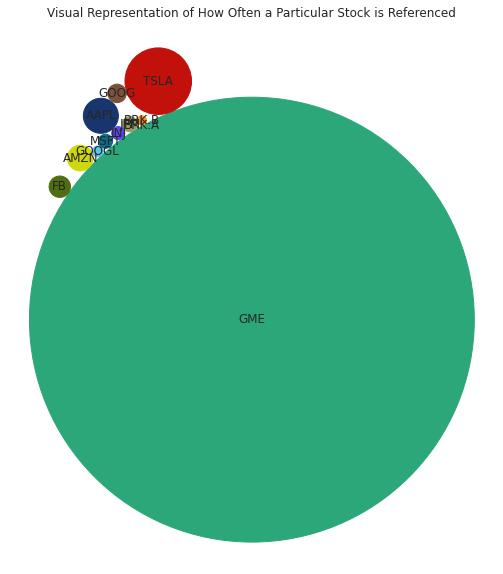

In [ ]:
# souce: https://matplotlib.org/devdocs/gallery/misc/packed_bubbles.html

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=temp['talked'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(10,10))
bubble_chart.plot(
    ax, temp['stock'], temp['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Visual Representation of How Often a Particular Stock is Referenced')

plt.show()

From our bubblechart, GME was the most discussed stock on r/WallStreetBets. There were other stocks that were also discussed but not highly mentioned compared to GME. Some of these stocks are very well known, even if you have limited to no knowledge of the stock market. Other stocks include but not limited to: Apple (AAPL), Amazon.com (AMZN), Facebook (FB) and Tesla Inc (TSLA).  

In [ ]:
temp['sentiment'] = []

titles['positive_sentiment'][titles['title'].str.contains('AMC')].mean()
# titles
for stock in temp['stock']:
    temp['sentiment'].append(titles['positive_sentiment'][titles['title'].str.contains(stock)].mean())
# titles['sentiments'] = titles['wot'].apply(lambda x: sia.polarity_scores(x))
tempDF = titles.copy()
tempDF['stock'] = tempDF['title'].apply(lambda title: 'GME' if 'GME' in title else ('AMC' if 'AMC' in title else ('AAPL' if 'AAPL' in title else ('TSLA' if 'TSLA' in title else np.nan))))
tempDF['sentiment'] = np.where(tempDF['positive_sentiment'] >= tempDF['neutral_sentiment'], tempDF['positive_sentiment'], tempDF['neutral_sentiment'])
tempDF['main_sentiment'] = np.where(tempDF['positive_sentiment'] >= tempDF['neutral_sentiment'], 'positive', 'neutral')
tempDF['sentiment'] = np.where(tempDF['sentiment'] >= tempDF['negative_sentiment'], tempDF['sentiment'], tempDF['neutral_sentiment'])
tempDF['main_sentiment'] = np.where(tempDF['sentiment'] >= tempDF['negative_sentiment'], tempDF['main_sentiment'], 'negative')

tempDF.head(3)

,title,timestamp,clean_text,positive_sentiment,neutral_sentiment,negative_sentiment,stock,sentiment,main_sentiment
0,"It's not about the money, it's about sending a...","Jan 28,2021",it not about the money it about sending message,0.000001,1.000001,0.000001,NaN,1.000001,neutral
1,Math Professor Scott Steiner says the numbers ...,"Jan 28,2021",math professor scott steiner says the numbers ...,0.000001,0.728001,0.272001,NaN,0.728001,neutral
2,Exit the system,"Jan 28,2021",exit the system,0.000001,1.000001,0.000001,NaN,1.000001,neutral


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 54.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


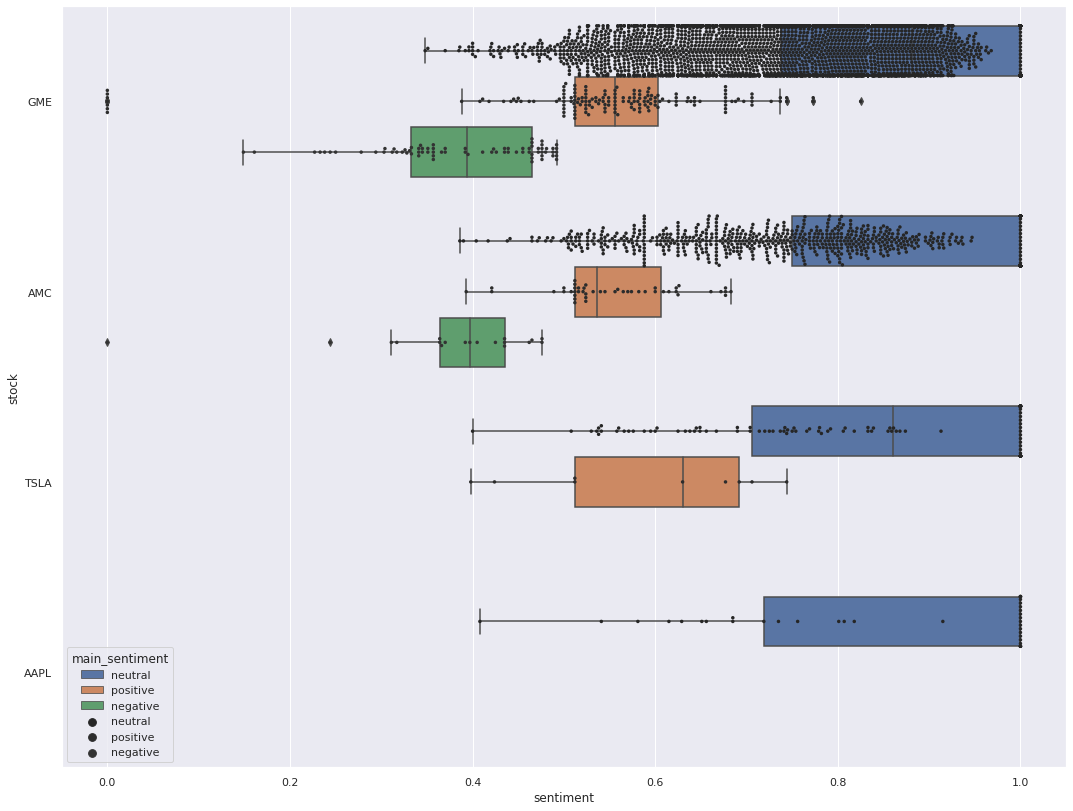

In [ ]:
# Swarmplot 

ax = sns.boxplot(y='stock', x='sentiment', hue='main_sentiment', data=tempDF)
# ax = sns.swarmplot(y='stock', x='sentiment', hue='main_sentiment', data=tempDF, dodge=True, color=".2", size=3.5)
plt.show()

The box and whisker plot shows that, overall, when a post was mostly neutral, it tended to be overwhelmingly neutral. Meanwhile, positive posts had tended to have roughly .5 positive sentiment. Negative posts, on the other hand, were generally a little over a third negatively sentiment. This also shows that predominantly negative posts tended to have slightly lower but nearly equivalent neutral and positive sentiment, otherwise the post would have been marked as mostly neutral or positive. 

The swarmplot shows the physical distribution of these posts. We can see that there was an overwhelming number of neutral posts as compared to positive or neutral posts. TSLA and AAPL stock did not even have predominantly negative or even positive posts.

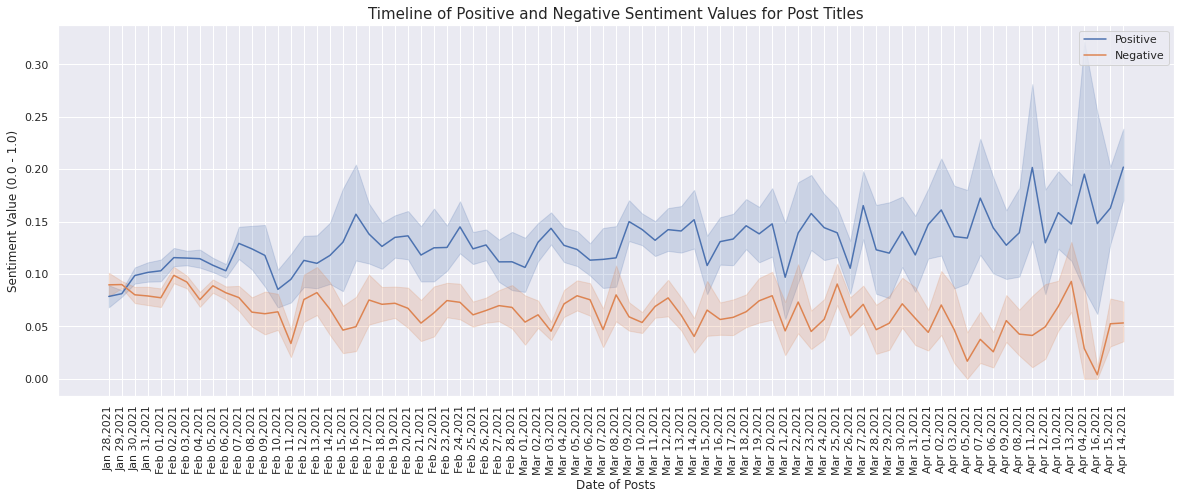

In [ ]:
# titles[['timestamp','positive_sentiment']].set_index('timestamp').plot.line()
# plot(titles.timestamp, titles.positive_sentiment)

sns.set(rc={'figure.figsize':(20,15)})

# fixing a data error
titles_update = titles.copy()
titles_update = titles_update[titles_update["timestamp"] != "Sep 29,2020"]

ax = plt.subplot(2,1,1)
sns.lineplot(x="timestamp", y="positive_sentiment", data=titles_update),
sns.lineplot(x="timestamp", y="negative_sentiment", data=titles_update)
# sns.lineplot(x="timestamp", y="neutral_sentiment", data=titles_update)
plt.xticks(rotation=90)

plt.title('Timeline of Positive and Negative Sentiment Values for Post Titles',fontsize=15)
ax.legend(['Positive', 'Negative'])
plt.xlabel('Date of Posts', fontsize=12)
plt.ylabel("Sentiment Value (0.0 - 1.0)", fontsize=12)
plt.show()

__Observations:__ The post titles appear to remain stable in the levels of positive and negative sentiment, however, near the trend looks as though the distance between negative and positive sentiment in the titles increased over time.

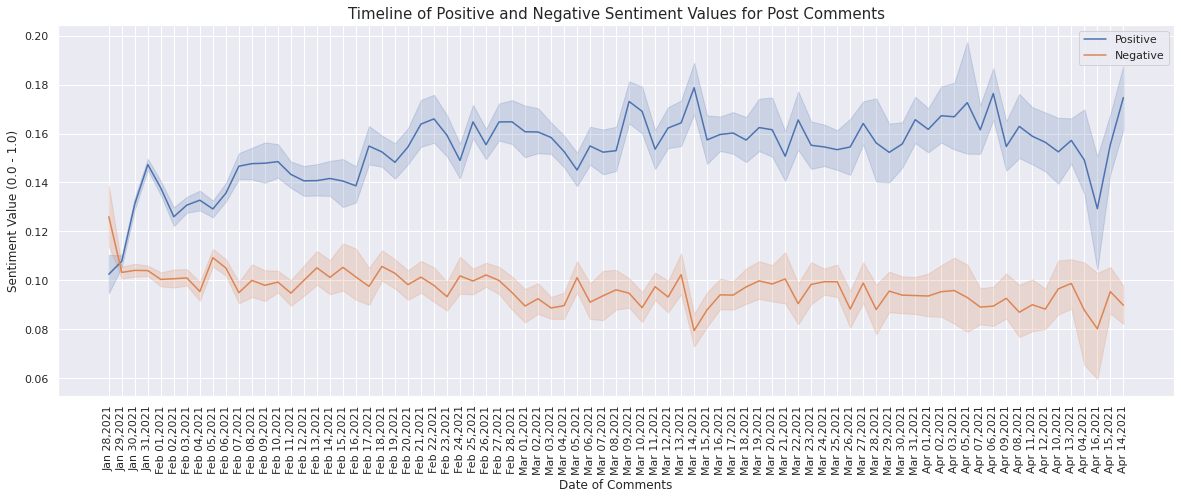

In [ ]:
# fixing a data error
comments_update = comments.copy()
comments_update = comments_update[comments_update["timestamp"] != "Sep 29,2020"]

ax = plt.subplot(2,1,1)
sns.lineplot(x="timestamp", y="positive_sentiment", data=comments_update),
sns.lineplot(x="timestamp", y="negative_sentiment", data=comments_update)
plt.xticks(rotation=90)

plt.title('Timeline of Positive and Negative Sentiment Values for Post Comments',fontsize=15)
ax.legend(['Positive', 'Negative'])
plt.xlabel('Date of Comments', fontsize=12)
plt.ylabel("Sentiment Value (0.0 - 1.0)", fontsize=12)
plt.show()

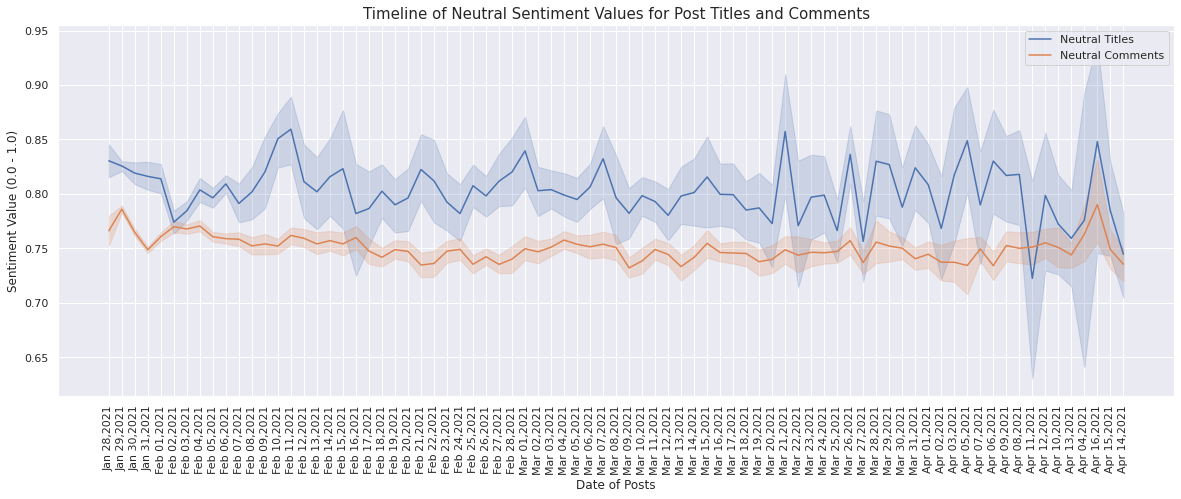

In [ ]:
ax = plt.subplot(2,1,1)
sns.lineplot(x="timestamp", y="neutral_sentiment", data=titles_update)
sns.lineplot(x="timestamp", y="neutral_sentiment", data=comments_update)
plt.xticks(rotation=90)

plt.title('Timeline of Neutral Sentiment Values for Post Titles and Comments',fontsize=15)
ax.legend(['Neutral Titles', 'Neutral Comments'])
plt.xlabel('Date of Posts', fontsize=12)
plt.ylabel("Sentiment Value (0.0 - 1.0)", fontsize=12)
plt.show()

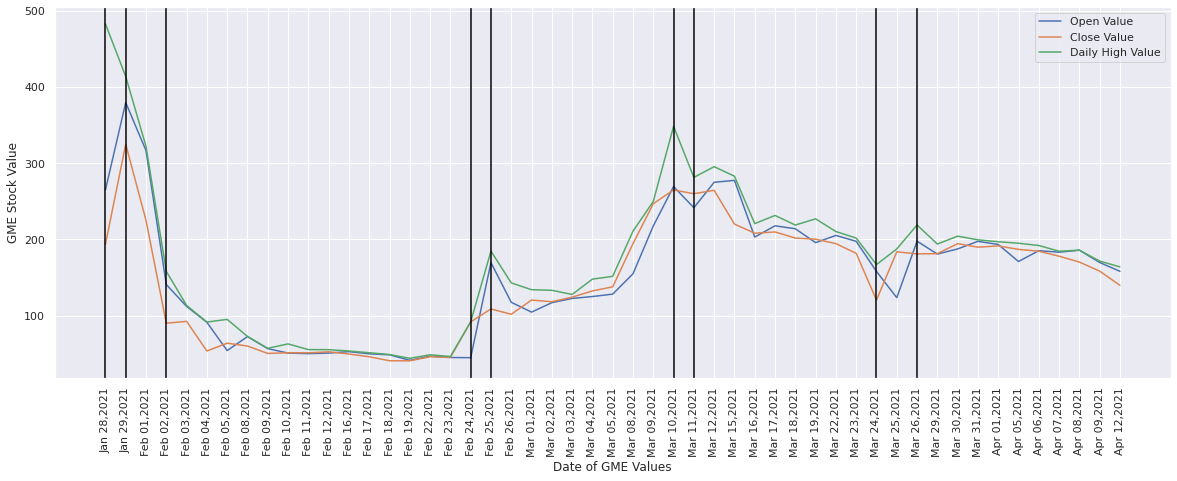

In [ ]:
ax = plt.subplot(2,1,1)
sns.lineplot(x="Date", y="Open", data=gmeDF)
sns.lineplot(x="Date", y="Close", data=gmeDF)
sns.lineplot(x="Date", y="High", data=gmeDF)
plt.xticks(rotation=90)

ax.legend(['Open Value', 'Close Value', 'Daily High Value'])
plt.xlabel('Date of GME Values', fontsize=12)
plt.ylabel("GME Stock Value", fontsize=12)
plt.axvline(0, 0, 1, color="black")
plt.axvline(1, 0, 1, color="black")
plt.axvline(3, 0, 1, color="black")
plt.axvline(18, 0, 1, color="black")
plt.axvline(19, 0, 1, color="black")
plt.axvline(28, 0, 1, color="black")
plt.axvline(29, 0, 1, color="black")
plt.axvline(38, 0, 1, color="black")
plt.axvline(40, 0, 1, color="black")

plt.show()

# 5) Analysis of Data
Based on the visuals performed on sentiment analysis and the data collected from Reddit posts and GME stocks, we can see the correlations between the two events. It is apparent that neutral titles and comments have the most density within these datasets, and there is a relation between the spikes in comments and the stock engagement for GME. 

Clearly, there are large fluctuations in the levels of positivity and negativity over the weeks following the GME short-squeeze event. As indicated in the last chart's vertical lines, multiple dates saw drastic increases and decreases in GME's share value. The levels of positive and negative sentiment are not as drastic in change, yet there do appear to be some relation between up and down turns in sentiment levels and GME's share value.

# 6) Conclusions

Based on the sentiment analysis done, we learned the following:

* The dominant sentiment of WallStreetBets posts is neutral.

* The sentiments of both titles, and comments are not static in nature, and they appear to have obvious reactions to specific events such as the Robinhood debacle and GME's 52-week high valuation.  

* The GME short-squeeze event clearly had influence from the hype and media around r/WallStreetBet's posts and activity. However, pulling advanced polarity sentiment from the subreddit's titles and comments did not turn up clear visualizations on how sentiments may have been impacting the market.

Our analysis was only specific on a particular stocks and subreddit. There is a lot of other data that can be collected to take this analysis even further.  For example, r/WallStreetBets is not the only subreddit that discuss about the stock market or investment related discussions.  Other subreddits that are similar in nature are but not limited to; r/stockmarket, r/investing, and r/finance. Overall, the analysis we conducted on both GME stock data and r/WallStreetBets post provided an interesting insight on the stock market and its history with the subreddit within the past few months.  

### Closing Thoughts

Arguably, sentiment analysis of r/WallStreetBets would only provide so much insight into the reasons this particular subreddit was able to have such an influence on the stock market. However, based on our analysis, and some basic rational thinking, we believe that there are a few factors that played large roles in this particular economic event.

Firstly, it is about the expansion of decentralization in financial markets (mostly thanks to the internet). New technologies such as easy trading mobile apps provide access to financial markets to a large number of amateurs or retail investors. They enable financial freedom and autonomy from the major banks and the other institutions that control the market.

Secondly, the GME short-squeeze appears to be an extension of the meme culture of millennials and generation Z (zoomers), in which emotions are expressed with internet media and abstract, often ironic humour. Social media posts might contain sequences of "inside-joke-like" nonsense, offensive terms and never-ending slang. As we pull from our wordcloud charts, profanity is a huge part of the speech included in r/WallStreetBets.

This type of cultural phenomenon makes it increasingly difficult to assess the sentiments (subjective and technical) behind these movements. For example, behavioural finance researchers would normally use algorithms to extract investor sentiments from Twitter posts, Reddit posts, Google search trends, and media headlines. But the problem is, how would you use the academic software to analyse the content on r/WallStreetBets? This a huge challenge (and one that we did not anticipate when beginning this project).

Finally, a driving force of this retail investor trend may be the current pandemic. A young generation of traders already blamed the older ones for the global financial crisis of 2008. The pandemic has amplified these feelings of social injustice and hatred against the money of the baby boomers, as millennials who grew up or studied during the past recession are now facing another one as young professionals. It also didn't help that government restrictions and the social isolation that they have caused have also potentially spiked rebellious sentiments. At the same time, this situation creates an ideal environment for all sorts of market manipulations.

Trying to analyze this information is not only challenging but also leads to more questions about culture than young aspiring data scientists may have anticipated. 

Nevertheless, _YOLO! Diamond Hands 💎🤲 Baby!_



Source: https://theconversation.com/gamestop-wallstreetbets-trader-army-is-back-for-a-second-share-rally-heres-how-to-make-sense-of-it-156083

__Project Work Credits:__

* Part 1:
    * __Kendal Collins__ focused on formatting and writing our team's QQQ document ensuring that we followed appropriate QQQ guidelines. She also kept the team on track regarding meeting times, due dates, what questions are needed to be addressed, overall project goals, and what was needed to be accomplished for this assignment. Kendal finalized our project report for Part 1 and wrote justifications and clarifications of the corresponding code. She also managed to convince our team members that turning our project into a meme was a bad idea.
    * __Anthony Nguyen__ obtained all of the stock market data and began the organization process within the project files. He also selctively found important stock datasets related to our r/WallStreetBets data (such as GameStop \[GME\], AMC Theatres \[AMC\], etc.) He also created a function to take input text files and convert them into Pandas dataframes, however, we ended up using different datasets in csv form. Anthony also came up with the initial idea to correlate Reddit posts and potential stock market manipulation.
    * __Nathan Hufano__ successfully web-scraped the r/WallStreetBets subreddit and obtained all of the associated comments for the posts in the `reddit_wsb.csv` allowing us to begin our sentiment analysis. Nathan was able to complete the web scraping by utilizing the Reddit API which he tinkered with in a separate Jupyter notebook. He also initialized the cleaning process for the comment data by ensuring that whitepace and random characters were handled appropriately.
    * __Camden Landis__ helped write up the QQQ document by detailing specifics of how the data were gathered as well as how we began to process the data. He also researched and obtained the base `reddit_wsb.csv` from Kaggle to be used for our project's analysis. He also assisted in the cleaning of the comments column in our main Reddit dataset as well as spearheading the analysis by checking whether or not posts had "GME" in the title to determine a superficial popularity of GameStop on the subreddit.


* Part 2: 
    * __Kendal Collins__ continued to format the QQQ document to ensure every aspect was included by adding comments and explanations of the code, as well as formatting the document to look finished based on QQQ report standards.  Kendal also started experimenting with the sentiment analysis by creating a positive/negative bag of words for the Reddit data, currently a work in progress. 
    * __Anthony Nguyen__ focused on finding ways to visualize our data, one of which was creating a bubblechart of different named stock besides GME and implementing the plot as part of our visualization section. Another was to create a swarmplot which would visualize the sentiment and mentions of each stock. The code for showing this plot was prepared is awaiting sentiment proper sentiment analysis.
    * __Nathan Hufano__ continued the cleaning process of the Reddit data by removing unwanted characters, creating a bag of words for both comment and title data, and changing the format of the dates into American notation.  The dates were also changed in the GME stock market data as part of the cleaning process. Nathan also experimented with the the visualizations by providing a sample plot of stock market data which could be of future use.
    * __Camden Landis__ utilized regular expressions to help clean the Reddit data (specifically the post titles and body content). He also began the sentiment analysis process on the Reddit posts by using a polarity tool from the `nltk` library. Camden visualized the sentiment values and frequencies and showed that neutral sentiment was more common among the posts than expected. By using the `wordclouds` module, he also visulaized the most commonly used words among both positive and negative sentiment collections. Camden continued to explain particular code segments, and he wrote observations he made from the visualizations.


* Part 3: 
    * __Kendal Collins__ finalized the QQQ format for the overall report, and added any comments necessary to explain the data visualizations and conclusions derived from the data collections and displays.
    * __Anthony Nguyen__ Finalized the swarm plot and looked over the distribution of sentiments of different stocks. Also created a box and whisker plot to visualize these as well.
    * __Nathan Hufano__ mainly finalized the data collection and process sections of the project by adding comments to explain the process of the code and changing/modifying code that was penalizing runtime. He also contributed to the conclusion of our analysis for this project.
    * __Camden Landis__ finalized the visualization process by plotting the various sentiment value types across the GME event timeframe. He also added a brief history of the GME situation including some of the main points in the timeline that may have had an impact on the GME stock valuation. Camden also contributed to the conclusion of our analysis for this project.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=169bfa36-708d-426e-97fc-f7ee00b8d5b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>